## **Exercise 1.03 - Guided Exercise**
### Performing Quality Investigation

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import certifi
from sklearn.datasets import fetch_openml

### Loading the Data

In [ ]:

df_X = pd.read_csv('https://raw.githubusercontent.com/fenago/datawrangling/main/miami-housing.csv')
df_X.sample(5)
df_X.head()

## **Structure Investigation**
Before looking at the content of our feature matrix , let's first look at the general structure of the dataset. For example, how many columns and rows does the dataset have?


In [ ]:
# Show size of the dataset
df_X.shape


In [ ]:
# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

##  Structure of numerical features
Next, take a closer look at the numerical features. More precisely, investigate how many unique values each of these feature has. This process will give some insights about the number of binary (2 unique values), ordinal (3 to ~10 unique values) and continuous (more than 10 unique values) features in the dataset.

In [ ]:
# For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include='number').nunique().sort_values()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')


In [ ]:

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

##  Conclusion of structure investigation
At the end of this first investigation, we should have a better understanding of the general structure of our dataset. Number of samples and features, what kind of data type each feature has, and how many of them are binary, ordinal, categorical or continuous. 

In [ ]:
df_X.info() 
df_X.describe()

### Quality Investigation
Before focusing on the actual content stored in these features, let's first take a look at the general quality of the dataset. The goal is to have a global view on the dataset with regards to things like duplicates, missing values and unwanted entries or recording errors.

In [ ]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=['PARCELNO'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

### Removing Duplicates

In [ ]:
#  Extract column names of all features, except 'PARCELNO' - unique feature
columns_to_consider = df_X.drop(labels=['PARCELNO'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X.drop_duplicates(subset=columns_to_consider, inplace=True)
df_X.shape

### Missing Values

In [ ]:
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

### Per Sample

In [ ]:

plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(df_X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));
# g = msno.bar(df_X, labels=True, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
# g.set_xticklabels(g.get_xticklabels(),rotation=90);

In [ ]:

df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

## Per Feature
As a next step, let's now look at the number of missing values per feature. For this we can use some pandas trickery to quickly identify the ratio of missing values per feature.



In [ ]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");


In [ ]:

df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

## Numerical Features
To plot this global view of the dataset, at least for the numerical features, you can use pandas' .plot() function and combine it with the following parameters:



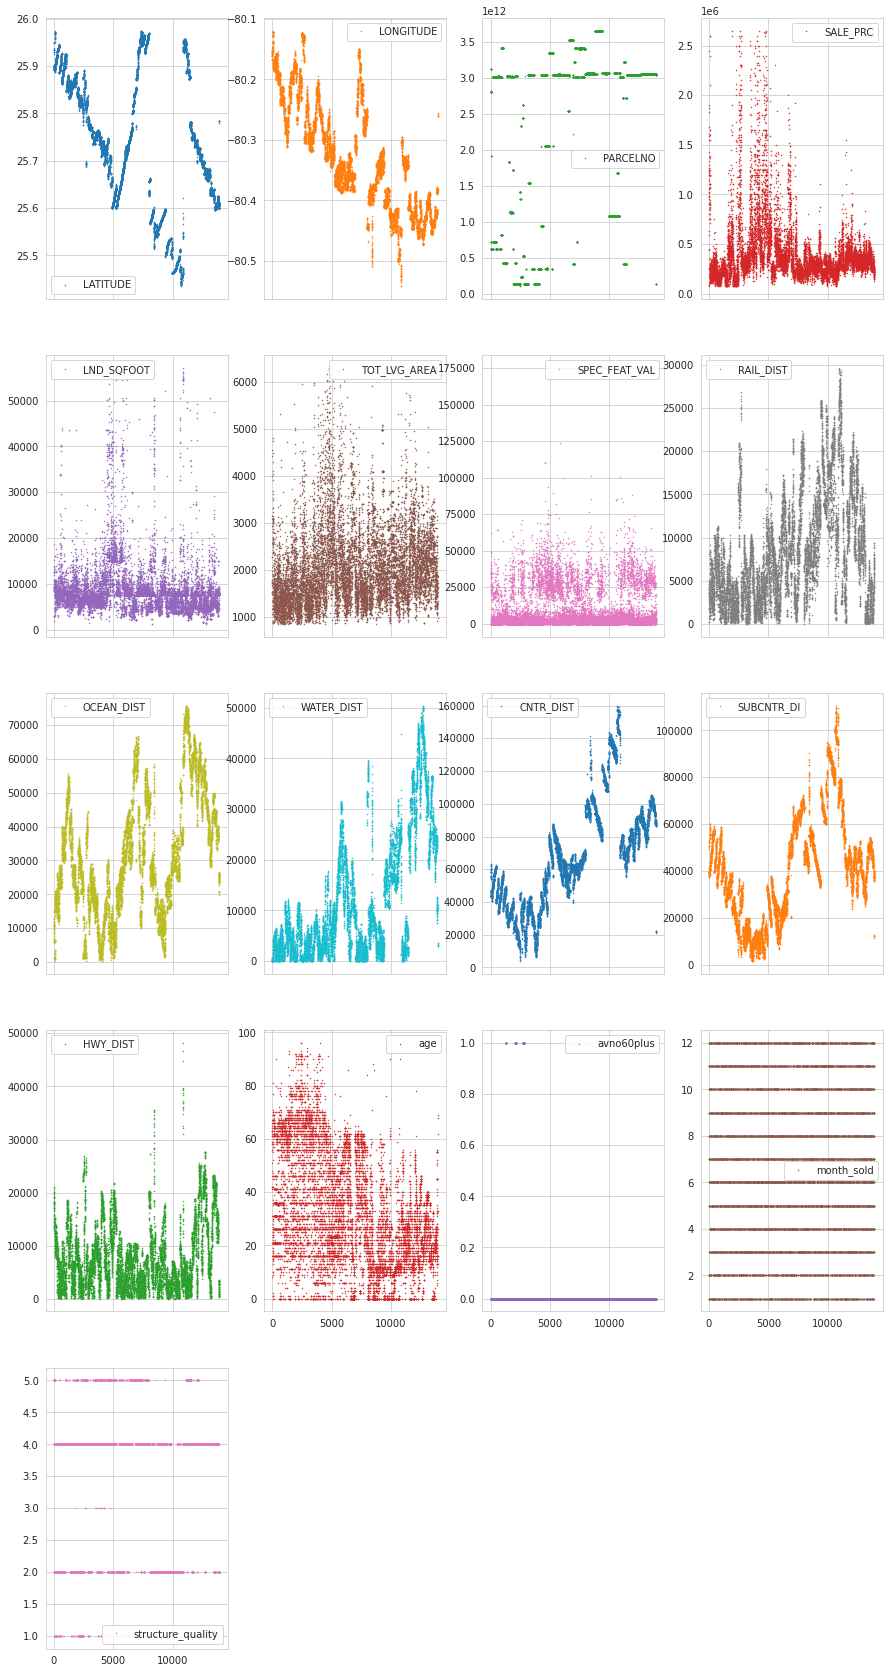

In [ ]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

## Non-numerical features

In [ ]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()
# Extract descriptive properties of non-numerical features
# df_X.describe(exclude="number").head()

""
0
1
2
3
4
